# Load Data
## multi-class

In [98]:
import pandas as pd

# Load data
data = pd.read_csv('nor_constant_o.csv')
X = data
X = X.drop(
    ['std_burst_med_o', 'std_dev_in_o', 'avg_med_o', 'avg_in_o', 'in_pack_num_o', 'in_pack_sum_o',
    'total_sum_pack_per_sec_o', 'sum_med_o', 'avg_burst_med_o', 'total_num_pack_per_sec_o',
    'sum_burst_med_o', 'in_sum_30_o', 'out_sum_30_o'], axis=1) # 필요없는 피쳐 제외하기
y_mul = pd.read_csv('y_mul.csv').iloc[:, -1]

In [99]:
len(X)

24000

In [100]:
y_mul

0         0
1         0
2         0
3         0
4         0
         ..
23995    95
23996    95
23997    95
23998    95
23999    95
Name: y, Length: 24000, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_mul, y_test_mul = train_test_split(X, y_mul, test_size=0.2, random_state=1)

## Train the model(K-NN)

In [102]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance') # best param
model_name = 'KNN'

model_knn.fit(X_train, y_train_mul)

KNeighborsClassifier(metric='manhattan', weights='distance')

## Test and evaluate

In [103]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred_mul = model_knn.predict(X_test)

result = confusion_matrix(y_test_mul, y_pred_mul)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_mul, y_pred_mul)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test_mul, y_pred_mul)
print("Accuracy:",result2)

Confusion Matrix:
[[ 16   0   0 ...   0   1   5]
 [  0  21   0 ...   0   0   7]
 [  0   0  34 ...   0   0   4]
 ...
 [  0   0   0 ...  28   0   2]
 [  0   0   0 ...   0  23   5]
 [  7   5  13 ...   1   2 565]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.32      0.39        50
           1       0.81      0.57      0.67        37
           2       0.61      0.74      0.67        46
           3       0.56      0.67      0.61        36
           4       0.82      0.60      0.69        47
           5       0.74      0.91      0.82        34
           6       0.73      0.70      0.71        46
           7       0.81      0.55      0.66        38
           8       0.60      0.75      0.67        36
           9       0.63      0.68      0.65        50
          10       0.71      0.61      0.66        49
          11       0.46      0.49      0.47        35
          12       0.83      0.90      0.87        50
          

## binary classification

In [104]:
from sklearn.model_selection import train_test_split

y_bin = pd.read_csv('y_bin.csv').iloc[:, -1]

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=1)

## Train the model(K-NN)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
model_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance') # best param
model_name = 'KNN'

model_knn.fit(X_train, y_train_bin)

KNeighborsClassifier(metric='manhattan', weights='distance')

## Test and evaluate

In [106]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_pred_bin = model_knn.predict(X_test)
tpr = recall_score(y_test_bin, y_pred_bin, average='micro')
precision = precision_score(y_test_bin, y_pred_bin, average='micro')
print(f'True Positive Rate: {tpr}')
print(f'False Positive Rate: {1 - tpr}')
print(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
print(f"[Confusion Matrix]\n {conf_matrix}")

True Positive Rate: 0.8672916666666667
False Positive Rate: 0.13270833333333332
Precision: 0.8672916666666667
[Confusion Matrix]
 [[ 484  491]
 [ 146 3679]]


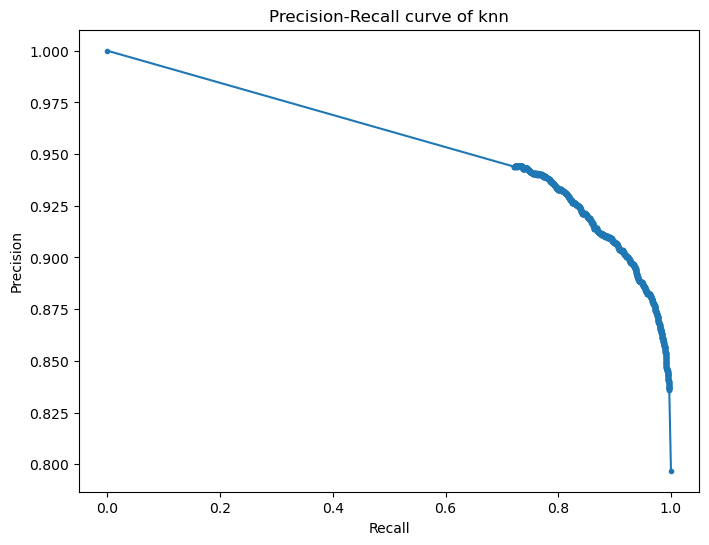

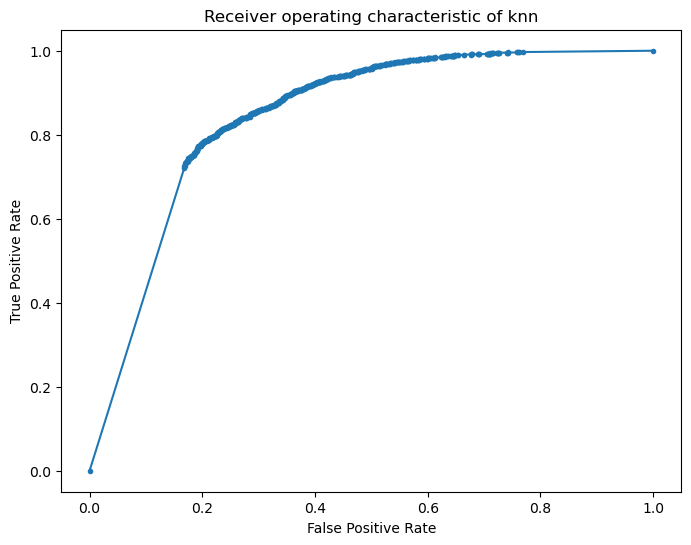

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_bin, model_knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve of knn')
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test_bin, model_knn.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic of knn')
plt.show()